In [1]:
#!pip install concrete-ml

In [3]:
try:
    import concrete.ml
except:
    import subprocess
    import IPython
    subprocess.check_output("pip install concrete-ml>=0.5.1", shell=True)
    IPython.Application.instance().kernel.do_shutdown(True) #automatically restarts kernel

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.29.165 which is incompatible.
albumentations 1.4.0 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
featuretools 1.30.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
kaggle-environments 1.14.3 requires scipy>=1.11.2, but you have scipy 1.10.1 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.23.5 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.

# Importing of libraries and data preprocessing 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the data 
df= pd.read_csv("/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# As we seen Column ID has no meaning here so, we will remove it
df.drop(["ID"], axis=1, inplace= True) #axis=1 -- column removal and inplcae= True --means change in the original data
df.isnull().sum()


LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [4]:
df['EDUCATION'] = df['EDUCATION'].replace({0: 1, 1: 1, 2: 2, 3: 3, 4: 4, 5: 1, 6: 1})
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 1, 1: 1, 2: 2, 3: 3})


In [5]:
# Independent features
X = df.drop(['default.payment.next.month'], axis=1)
# Dependent feature
y = df['default.payment.next.month']
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Splitting Dataset into training and testing 

In [6]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [7]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE= SMOTE()

# fit and apply the transform 
X_train,y_train= SMOTE.fit_resample(X_train,y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 18677, 1: 5323})
After oversampling:  Counter({0: 18677, 1: 18677})


> # Machine Learning Model Implementation 

# Logistic Regression

### With FHE Encryption


In [8]:
from concrete.ml.sklearn.linear_model import LogisticRegression as LogisticRegression_fhe
logit_fhe= LogisticRegression_fhe()
logit_fhe.fit(X_train, y_train)
pred_logit_fhe= logit_fhe.predict(X_test)

In [9]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_precision_recall_curve

print("The accuracy of logit model is:", accuracy_score(y_test, pred_logit_fhe))
print(classification_report(y_test, pred_logit_fhe))

The accuracy of logit model is: 0.6866666666666666
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      4687
           1       0.38      0.66      0.48      1313

    accuracy                           0.69      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.69      0.71      6000



### Without FHE Encryption

In [10]:
from sklearn.linear_model import LogisticRegression 
logit= LogisticRegression()
logit.fit(X_train, y_train)
pred_logit= logit.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_precision_recall_curve

print("The accuracy of logit model is:", accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))

The accuracy of logit model is: 0.686
              precision    recall  f1-score   support

           0       0.88      0.69      0.78      4687
           1       0.38      0.66      0.48      1313

    accuracy                           0.69      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.69      0.71      6000



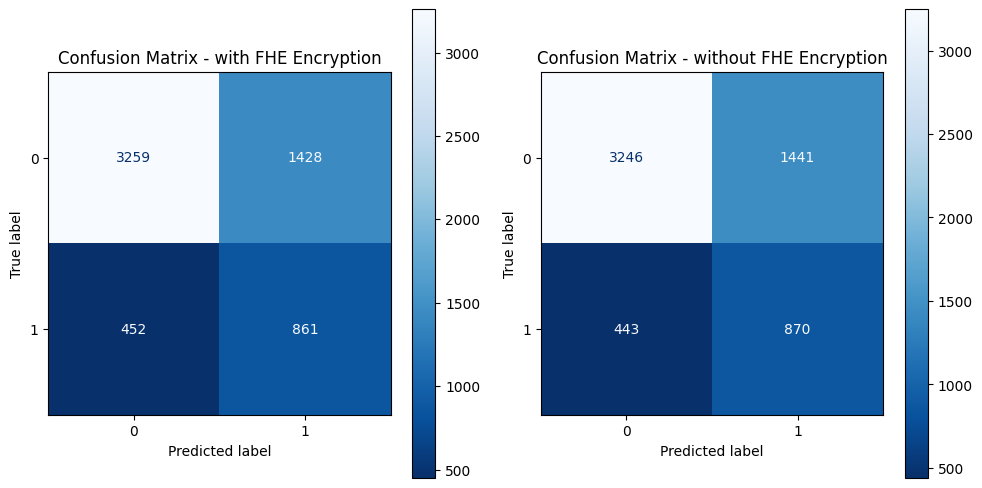

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# Fit the logit_fhe model
logit_fhe.fit(X_train, y_train)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure with 1 row and 2 columns

# Plot the confusion matrix for logit_fhe
axs[0].set_title('Confusion Matrix - with FHE Encryption')
plot_confusion_matrix(logit_fhe, X_test, y_test, cmap="Blues_r", ax=axs[0])

# Plot the confusion matrix for logit
axs[1].set_title('Confusion Matrix - without FHE Encryption')
plot_confusion_matrix(logit, X_test, y_test, cmap="Blues_r", ax=axs[1])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Random Forest Classifier

In [13]:
from concrete.ml.sklearn.rf import RandomForestClassifier as RandomForestClassifier_fhe
rf_fhe= RandomForestClassifier_fhe()
# Fitting the model
rf_fhe.fit(X_train,y_train)
pred_rf_fhe= rf_fhe.predict(X_test)

In [14]:
print("The accuracy of logit model is:", accuracy_score(y_test, pred_rf_fhe))
print(classification_report(y_test,pred_rf_fhe ))

The accuracy of logit model is: 0.781
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4687
           1       0.50      0.58      0.54      1313

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.78      0.79      6000



In [15]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
# Fitting the model
rf.fit(X_train,y_train)
pred_rf= rf.predict(X_test)

In [16]:
print("The accuracy of logit model is:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test,pred_rf ))

The accuracy of logit model is: 0.7951666666666667
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4687
           1       0.54      0.48      0.50      1313

    accuracy                           0.80      6000
   macro avg       0.70      0.68      0.69      6000
weighted avg       0.79      0.80      0.79      6000



## Comparion

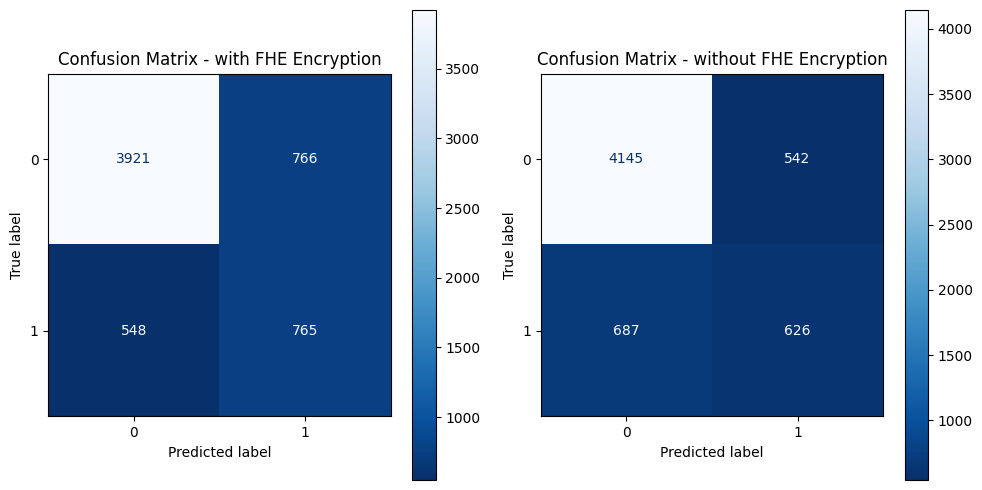

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# Fit the logit_fhe model
logit_fhe.fit(X_train, y_train)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure with 1 row and 2 columns

# Plot the confusion matrix for logit_fhe
axs[0].set_title('Confusion Matrix - with FHE Encryption')
plot_confusion_matrix(rf_fhe, X_test, y_test, cmap="Blues_r", ax=axs[0])

# Plot the confusion matrix for logit
axs[1].set_title('Confusion Matrix - without FHE Encryption')
plot_confusion_matrix(rf, X_test, y_test, cmap="Blues_r", ax=axs[1])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# XGB Boost Classifier

## With FHE Encryption

In [18]:
#import concrete.ml.sklearn.xgb as XGBClassifier

from concrete.ml.sklearn import XGBClassifier as ConcreteXGBClassifier_fhe

#xgb_clf= xgb.XGBClassifier()

concrete_model = ConcreteXGBClassifier_fhe(n_bits=5)
concrete_model.fit(X_train, y_train);

#fitting the model
#xgb_clf.fit(X_train,y_train)
## Predicting the model
xgb_predict_fhe= concrete_model.predict(X_test)

In [19]:
print("The accuracy of logit model is:", accuracy_score(y_test, xgb_predict_fhe))
print(classification_report(y_test,xgb_predict_fhe))

The accuracy of logit model is: 0.7921666666666667
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4687
           1       0.52      0.56      0.54      1313

    accuracy                           0.79      6000
   macro avg       0.70      0.71      0.70      6000
weighted avg       0.80      0.79      0.79      6000



## Without FHE Encryption

In [20]:
from xgboost import XGBClassifier

#xgb_clf= xgb.XGBClassifier()

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train);

xgb_predict= xgb_model.predict(X_test)

In [21]:
print("The accuracy of logit model is:", accuracy_score(y_test, xgb_predict))
print(classification_report(y_test,xgb_predict ))

The accuracy of logit model is: 0.8101666666666667
              precision    recall  f1-score   support

           0       0.85      0.93      0.88      4687
           1       0.60      0.40      0.48      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.66      0.68      6000
weighted avg       0.79      0.81      0.80      6000



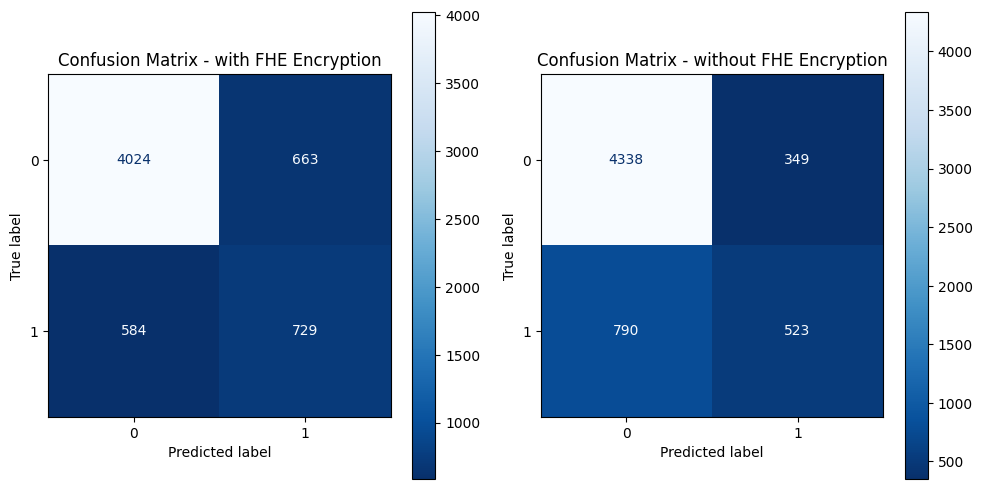

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# Fit the logit_fhe model
logit_fhe.fit(X_train, y_train)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure with 1 row and 2 columns

# Plot the confusion matrix for logit_fhe
axs[0].set_title('Confusion Matrix - with FHE Encryption')
plot_confusion_matrix(concrete_model, X_test, y_test, cmap="Blues_r", ax=axs[0])

# Plot the confusion matrix for logit
axs[1].set_title('Confusion Matrix - without FHE Encryption')
plot_confusion_matrix(xgb_model, X_test, y_test, cmap="Blues_r", ax=axs[1])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
